# **Dataset Comparison**



> We try to compare each text preprocessing method, so we can find out which method is the best.




In [114]:
import pandas as pd
import numpy as np

# Original dataset vs AI-Structure deletion dataset

## Original Dataset

In [115]:
df = pd.read_csv('/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_01.csv')
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [116]:
#Check many possible ways that It will be null

df[df['text'].isnull()].head()

,text,label,prompt_name,source,RDizzl3_seven
44918,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44944,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45059,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45074,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45089,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [117]:
df[df['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')].head()

,text,label,prompt_name,source,RDizzl3_seven
44920,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44936,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45169,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45275,,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45475,\n\n,1,Does the electoral college work?,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [118]:
# Drop rows where 'text' is NaN or None
df = df.dropna(subset=['text'])

# Drop rows where 'text' is an empty string or whitespace
df = df[df['text'].str.strip() != '']

In [119]:
#Checking that there is no more missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65328 non-null  object
 1   label          65328 non-null  int64 
 2   prompt_name    65328 non-null  object
 3   source         65328 non-null  object
 4   RDizzl3_seven  65328 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.6+ MB


In [120]:
# Detect duplicates that in our dataset has duplicated or not.
df[df.duplicated() == True].shape

(0, 5)

In [121]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\n') == True].shape

(63463, 5)

In [122]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\r') == True].shape

(220, 5)

In [123]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\t') == True].shape

(1, 5)

In [124]:
#We try to replace '\n' with ' '
df['text'] = df['text'].str.replace('\n', ' ', regex=False)
df['text'] = df['text'].str.replace('\r', ' ', regex=False)
df['text'] = df['text'].str.replace('\t', ' ', regex=False)
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones Modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices Tod...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving Drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving The abilit...,0,Phones and driving,persuade_corpus,False


In [125]:
df.reset_index(drop=True, inplace=True)

In [126]:
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones Modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices Tod...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving Drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving The abilit...,0,Phones and driving,persuade_corpus,False


In [127]:
df.iloc[32456,0]

"[Your Name] [Your Address] [City, State, ZIP Code] [Email Address] [Phone Number] [Date]  [Senator's Name] [Senator's Address] [City, State, ZIP Code]  Dear Senator [Senator's Last Name],  I am writing to express my opinion on the issue of whether to keep the Electoral College or change to a popular vote system for the election of the President of the United States. After carefully considering the information from various sources, I firmly believe that it is in the best interest of our nation to maintain the Electoral College system. Though there are arguments in favor of both systems, the Electoral College provides several important benefits that should not be overlooked.  One of the fundamental reasons to retain the Electoral College is the certainty of outcome. As stated in the passage by Judge Richard A. Posner, the winning candidate's share of the Electoral College typically exceeds their share of the popular vote. This ensures that the result of the election is decisive and mini

## AI-Structure Deletion Dataset

In [128]:
df1 = pd.read_csv('/kaggle/input/bert555/final_cleaned (1).csv')
df1.head()

,text,label,prompt_name,source
0,Phones Modern humans today are always on their...,0,Phones and driving,persuade_corpus
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus
2,Driving while the use of cellular devices Toda...,0,Phones and driving,persuade_corpus
3,Phones & Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus
4,Cell Phone Operation While Driving The ability...,0,Phones and driving,persuade_corpus


In [129]:
df1.iloc[32456,0]

"Dear Senator , I am writing to express my opinion on the issue of whether to keep the Electoral College or change to a popular vote system for the election of the President of the United States. After carefully considering the information from various sources, I firmly believe that it is in the best interest of our nation to maintain the Electoral College system. Though there are arguments in favor of both systems, the Electoral College provides several important benefits that should not be overlooked. One of the fundamental reasons to retain the Electoral College is the certainty of outcome. As stated in the passage by Judge Richard A. Posner, the winning candidate's share of the Electoral College typically exceeds their share of the popular vote. This ensures that the result of the election is decisive and minimizes the possibility of lengthy legal disputes. In contrast, a direct popular vote system could lead to close elections with no clear winner, which could potentially necessit

## Training / Validation / Test set

### Original Dataset

In [130]:
df.shape

(65328, 5)

In [131]:
df[['prompt_name','source']].value_counts()

prompt_name                       source              
Facial action coding system       persuade_corpus         2167
Distance learning                 persuade_corpus         2157
Does the electoral college work?  persuade_corpus         2046
Car-free cities                   persuade_corpus         1959
Driverless cars                   persuade_corpus         1886
                                                          ... 
Seeking multiple opinions         cohere-command             1
Does the electoral college work?  mistral7binstruct_v2       1
Exploring Venus                   mistral7binstruct_v2       1
The Face on Mars                  mistral7binstruct_v1       1
                                  mistral7binstruct_v2       1
Name: count, Length: 248, dtype: int64

In [132]:
#Create the stratification key
df['stratify_key'] = df['prompt_name'].astype(str) + '_' + df['source'].astype(str) + '_' + df['label'].astype(str)

# Separate small groups with less than 2 records
group_counts = df['stratify_key'].value_counts()
small_groups = group_counts[group_counts < 2].index
df_small = df[df['stratify_key'].isin(small_groups)]
df_large = df[~df['stratify_key'].isin(small_groups)]

In [133]:
# Perform stratified sampling on the larger groups
from sklearn.model_selection import train_test_split

df_large_sample, _ = train_test_split(df_large, train_size=12492, stratify=df_large['stratify_key'], random_state=20240930)

# Combine the sampled large groups with small groups
df_sample = pd.concat([df_large_sample, df_small])

df_sample[['prompt_name','source']].value_counts()

prompt_name                       source                            
Facial action coding system       persuade_corpus                       414
Distance learning                 persuade_corpus                       412
Does the electoral college work?  persuade_corpus                       391
Car-free cities                   persuade_corpus                       375
Driverless cars                   persuade_corpus                       361
                                                                       ... 
Distance learning                 mistralai/Mistral-7B-Instruct-v0.1      1
Does the electoral college work?  chat_gpt_moth                           1
Driverless cars                   mistral7binstruct_v1                    1
                                  mistral7binstruct_v2                    1
Exploring Venus                   chat_gpt_moth                           1
Name: count, Length: 245, dtype: int64

In [134]:
# View the sampled DataFrame
df_sample = df_sample[['text','label']]
df_sample.head()

,text,label
38259,"Hey, y'all! Today we're gonna talk about how e...",1
52605,"Dear Senator [Name], I am writing to you tod...",1
12615,"When the Viking 1 discovered the face on Mars,...",0
1751,source 1 The upscale community are suburban p...,0
42892,"Dear Florida state senator, The Electoral Coll...",0


In [135]:
df_sample.shape

(12500, 2)

In [136]:
# Define outcome name
outcomename = 'label'

# Redefine X and Y after sampling
X_sampled = df_sample.drop(columns=outcomename)
Y_sampled = df_sample[outcomename]

# Split into training and combined validation-test sets (80% train, 20% valid/test)
X_train_df0, X_valid_test_df0, y_train_df0, y_valid_test_df0 = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=20240930, stratify=Y_sampled)

# Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
X_val_df0, X_test_df0, y_val_df0, y_test_df0 = train_test_split(X_valid_test_df0, y_valid_test_df0, test_size=0.5, random_state=20240930, stratify=y_valid_test_df0)

In [137]:
X_train_df0.head()

,text
9018,The author doesn't support his own idea. He li...
50067,A cowboy who rode the waves of the ocean is a...
55206,"As a NASA scientist, I understand that the ide..."
24489,When people are seeking advice they usually as...
21841,Dear Principal I know that many students don'...


### AI-Structure Deletion Dataset

In [138]:
#Create the stratification key
df1['stratify_key'] = df1['prompt_name'].astype(str) + '_' + df1['source'].astype(str) + '_' + df1['label'].astype(str)

# Separate small groups with less than 2 records
group_counts = df1['stratify_key'].value_counts()
small_groups = group_counts[group_counts < 2].index
df_small = df1[df1['stratify_key'].isin(small_groups)]
df_large = df1[~df1['stratify_key'].isin(small_groups)]

In [139]:
# Perform stratified sampling on the larger groups
from sklearn.model_selection import train_test_split

df_large_sample, _ = train_test_split(df_large, train_size=12492, stratify=df_large['stratify_key'], random_state=20240930)

# Combine the sampled large groups with small groups
df_sample = pd.concat([df_large_sample, df_small])

df_sample[['prompt_name','source']].value_counts()

prompt_name                       source                            
Facial action coding system       persuade_corpus                       414
Distance learning                 persuade_corpus                       412
Does the electoral college work?  persuade_corpus                       391
Car-free cities                   persuade_corpus                       375
Driverless cars                   persuade_corpus                       361
                                                                       ... 
Distance learning                 mistralai/Mistral-7B-Instruct-v0.1      1
Does the electoral college work?  chat_gpt_moth                           1
Driverless cars                   mistral7binstruct_v1                    1
                                  mistral7binstruct_v2                    1
Exploring Venus                   chat_gpt_moth                           1
Name: count, Length: 245, dtype: int64

In [140]:
# View the sampled DataFrame
df_sample = df_sample[['text','label']]
df_sample.head()

,text,label
38259,"Hey, y'all! Today we're gonna talk about how e...",1
52605,"Dear Senator , I am writing to you today with ...",1
12615,"When the Viking 1 discovered the face on Mars,...",0
1751,source 1 The upscale community are suburban pi...,0
42892,"Dear Florida state senator, The Electoral Coll...",0


In [141]:
# Define outcome name
outcomename = 'label'

# Redefine X and Y after sampling
X_sampled = df_sample.drop(columns=outcomename)
Y_sampled = df_sample[outcomename]

# Split into training and combined validation-test sets (80% train, 20% valid/test)
X_train_df1, X_valid_test_df1, y_train_df1, y_valid_test_df1 = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=20240930, stratify=Y_sampled)

# Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
X_val_df1, X_test_df1, y_val_df1, y_test_df1 = train_test_split(X_valid_test_df1, y_valid_test_df1, test_size=0.5, random_state=20240930, stratify=y_valid_test_df1)

In [142]:
X_train_df0.head()

,text
9018,The author doesn't support his own idea. He li...
50067,A cowboy who rode the waves of the ocean is a...
55206,"As a NASA scientist, I understand that the ide..."
24489,When people are seeking advice they usually as...
21841,Dear Principal I know that many students don'...


In [143]:
X_train_df1.head()

,text
9018,The author doesn't support his own idea. He li...
50067,A cowboy who rode the waves of the ocean is a ...
55206,"As a NASA scientist, I understand that the ide..."
24489,When people are seeking advice they usually as...
21841,Dear Principal I know that many students don't...


In [144]:
X_sampled.shape

(12500, 1)

## LSTM

## Bi-LSTM

## BERT

In [145]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [146]:
# Load model directly
from transformers import BertForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [147]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df0_dataset = CustomDataset(X_train_df0['text'], y_train_df0, tokenizer)
train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)

# For validation datasets
val_df0_dataset = CustomDataset(X_val_df0['text'], y_val_df0, tokenizer)
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test_df0['text'], y_test_df1, tokenizer)
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)

In [148]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU is available. Using GPU: Tesla P100-PCIE-16GB


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [149]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [150]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 0

#### Seed 1

In [151]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [152]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [153]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [154]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.085800,0.044497,0.988800
2,0.030300,0.107901,0.980000
3,0.012700,0.079947,0.985600


TrainOutput(global_step=1875, training_loss=0.03513184274037679, metrics={'train_runtime': 1789.5686, 'train_samples_per_second': 16.764, 'train_steps_per_second': 1.048, 'total_flos': 7893331660800000.0, 'train_loss': 0.03513184274037679, 'epoch': 3.0})

In [155]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [156]:
# Load model directly
from transformers import AutoModelForSequenceClassification

In [170]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1875", num_labels=2)
model1.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [161]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       524
           1       0.98      1.00      0.99       726

    accuracy                           0.99      1250
   macro avg       0.99      0.98      0.99      1250
weighted avg       0.99      0.99      0.99      1250



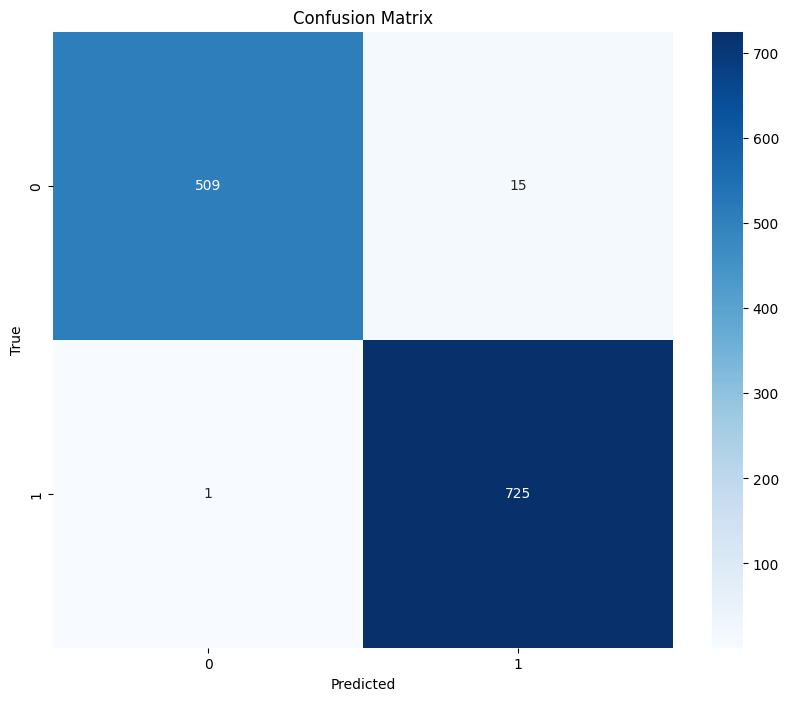

In [162]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [163]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [164]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [165]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1875", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1875", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [185]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [186]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [187]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.098100,0.023603,0.992800
2,0.025000,0.094033,0.984800
3,0.012500,0.099687,0.982400


TrainOutput(global_step=1875, training_loss=0.037405557759602866, metrics={'train_runtime': 1792.3383, 'train_samples_per_second': 16.738, 'train_steps_per_second': 1.046, 'total_flos': 7893331660800000.0, 'train_loss': 0.037405557759602866, 'epoch': 3.0})

In [188]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [189]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1875", num_labels=2)
model1.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [190]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       524
           1       0.97      1.00      0.99       726

    accuracy                           0.98      1250
   macro avg       0.99      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



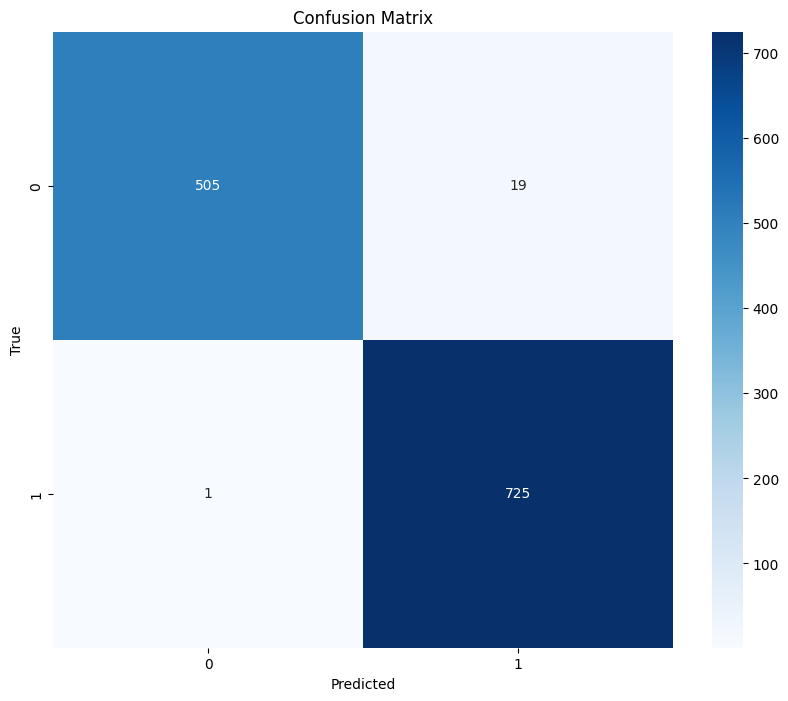

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## DistilBERT

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df0_dataset = CustomDataset(X_train['text'], y_train, tokenizer)
train_df1_dataset = CustomDataset(X_train1['text'], y_train1, tokenizer)

# For validation datasets
val_df0_dataset = CustomDataset(X_val['text'], y_val, tokenizer)
val_df1_dataset = CustomDataset(X_val1['text'], y_val1, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test['text'], y_test, tokenizer)
test_df1_dataset = CustomDataset(X_test1['text'], y_test1, tokenizer)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 0

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## RoBERTa

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)
tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base")

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df0_dataset = CustomDataset(X_train['text'], y_train, tokenizer)
train_df1_dataset = CustomDataset(X_train1['text'], y_train1, tokenizer)

# For validation datasets
val_df0_dataset = CustomDataset(X_val['text'], y_val, tokenizer)
val_df1_dataset = CustomDataset(X_val1['text'], y_val1, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test['text'], y_test, tokenizer)
test_df1_dataset = CustomDataset(X_test1['text'], y_test1, tokenizer)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 0

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## ALBERT

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification

tokenizer = AlbertTokenizer.from_pretrained("albert/albert-xlarge-v2")
model = AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df0_dataset = CustomDataset(X_train['text'], y_train, tokenizer)
train_df1_dataset = CustomDataset(X_train1['text'], y_train1, tokenizer)

# For validation datasets
val_df0_dataset = CustomDataset(X_val['text'], y_val, tokenizer)
val_df1_dataset = CustomDataset(X_val1['text'], y_val1, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test['text'], y_test, tokenizer)
test_df1_dataset = CustomDataset(X_test1['text'], y_test1, tokenizer)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 0

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Other text preprocessing method

## Removing punctuation

In [109]:
df2 = df1.copy()
df2.head()

,text,label,prompt_name,source,stratify_key
0,Phones Modern humans today are always on their...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
2,Driving while the use of cellular devices Toda...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
3,Phones & Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
4,Cell Phone Operation While Driving The ability...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0


In [110]:
# Remove punctuation from the 'text' column
import string
df2['text'] = df2['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df2.head()

,text,label,prompt_name,source,stratify_key
0,Phones Modern humans today are always on their...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
2,Driving while the use of cellular devices Toda...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
3,Phones Driving Drivers should not be able to ...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
4,Cell Phone Operation While Driving The ability...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0


## Stemming

In [111]:
df3 = df1.copy()
df3.head()

,text,label,prompt_name,source,stratify_key
0,Phones Modern humans today are always on their...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
2,Driving while the use of cellular devices Toda...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
3,Phones & Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
4,Cell Phone Operation While Driving The ability...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0


In [112]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data (only needs to be run once)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [113]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to remove punctuation and apply stemming
def stem_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)

# Apply the function to the 'text' column
df3['text'] = df3['text'].apply(stem_text)

In [114]:
df3.head()

,text,label,prompt_name,source,stratify_key
0,phone modern human today are alway on their ph...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
1,thi essay will explain if driver should or sho...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
2,drive while the use of cellular devic today mo...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
3,phone drive driver should not be abl to use ph...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
4,cell phone oper while drive the abil to stay c...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0


## Removing stopword

In [115]:
df4 = df1.copy()
df4.head()

,text,label,prompt_name,source,stratify_key
0,Phones Modern humans today are always on their...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
2,Driving while the use of cellular devices Toda...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
3,Phones & Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
4,Cell Phone Operation While Driving The ability...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0


In [116]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [117]:
# Initialize stopwords list
stop_words = set(stopwords.words('english'))

# Function to clean text (remove punctuation and stopwords)
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a sentence
    return ' '.join(filtered_words)

# Apply the function to the 'text' column
df4['text'] = df4['text'].apply(clean_text)

In [118]:
df4.head()

,text,label,prompt_name,source,stratify_key
0,Phones Modern humans today always phone always...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
1,essay explain drivers able use electronic devi...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
2,Driving use cellular devices Today society tho...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
3,Phones Driving Drivers able use phones operati...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0
4,Cell Phone Operation Driving ability stay conn...,0,Phones and driving,persuade_corpus,Phones and driving_persuade_corpus_0


## Training / Validation / Test set

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your 3 DataFrames are stored in a list
dfs = [df2, df3, df4]

# Iterate over each DataFrame and process them
for i, dfs in enumerate(dfs, start=2):

    # Create the stratification key
    dfs['stratify_key'] = dfs['prompt_name'].astype(str) + '_' + dfs['source'].astype(str) + '_' + dfs['label'].astype(str)

    # Separate small groups with less than 2 records
    group_counts = dfs['stratify_key'].value_counts()
    small_groups = group_counts[group_counts < 2].index
    df_small = dfs[dfs['stratify_key'].isin(small_groups)]
    df_large = dfs[~dfs['stratify_key'].isin(small_groups)]

    # Perform stratified sampling on the larger groups
    df_large_sample, _ = train_test_split(
        df_large,
        train_size=12442,
        stratify=df_large['stratify_key'],
        random_state=20240930
    )

    # Combine the sampled large groups with small groups
    df_sample = pd.concat([df_large_sample, df_small])

    # View the sampled DataFrame
    df_sample = df_sample[['text', 'label']]

    # Define outcome name
    outcomename = 'label'

    # Redefine X and Y after sampling
    X_sampled = df_sample.drop(columns=outcomename)
    Y_sampled = df_sample[outcomename]

    # Split into training and combined validation-test sets (80% train, 20% valid/test)
    X_train, X_valid_test, y_train, y_valid_test = train_test_split(
        X_sampled, Y_sampled, test_size=0.2, random_state=20240930, stratify=Y_sampled
    )

    # Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_valid_test, y_valid_test, test_size=0.5, random_state=20240930, stratify=y_valid_test
    )

    # Assign each split to dynamically named variables (separate for features and labels)
    globals()[f'X_train_df{i}'] = X_train
    globals()[f'y_train_df{i}'] = y_train
    globals()[f'X_val_df{i}'] = X_val
    globals()[f'y_val_df{i}'] = y_val
    globals()[f'X_test_df{i}'] = X_test
    globals()[f'y_test_df{i}'] = y_test

# Now you have variables like X_train_df1, y_train_df1, X_val_df1, ..., X_test_df3, y_test_df3

In [165]:
X_train.head()

,text
28721,"Dear Principal Smith, I am writing to expres..."
9940,Bases on the passage I think it would be a goo...
31678,Character traits can be extremely important wh...
11924,While being able to tell someone's emotions ca...
60793,"As technology progresses, automobiles are bein..."


In [166]:
X_train1.head()

,text
28721,"Dear Principal Smith, I am writing to express ..."
9940,Bases on the passage I think it would be a goo...
31678,Character traits can be extremely important wh...
11924,While being able to tell someone's emotions ca...
60793,"As technology progresses, automobiles are bein..."


In [167]:
X_train_df1.head()

,text
28721,Dear Principal Smith I am writing to express m...
9940,Bases on the passage I think it would be a goo...
31678,Character traits can be extremely important wh...
11924,While being able to tell someones emotions can...
60793,As technology progresses automobiles are being...


In [168]:
X_train_df2.head()

,text
28721,dear princip smith i am write to express my vi...
9940,base on the passag i think it would be a good ...
31678,charact trait can be extrem import when it com...
11924,while be abl to tell someon emot can be a bene...
60793,as technolog progress automobil are be modifi ...


In [169]:
X_train_df3.head()

,text
28721,Dear Principal Smith writing express views pos...
9940,Bases passage think would good idea technology...
31678,Character traits extremely important comes tac...
11924,able tell someones emotions benefitial factor ...
60793,technology progresses automobiles modified cat...


## LSTM

## Bi-LSTM

## BERT

In [ ]:
!pip install evaluate

In [ ]:
# Load model directly
from transformers import BertForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)

# For validation datasets
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 2

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 3

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## DistilBERT

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)

# For validation datasets
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 2

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 3

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## RoBERTa

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)
tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base")

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)

# For validation datasets
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 2

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 3

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## ALBERT

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification

tokenizer = AlbertTokenizer.from_pretrained("albert/albert-xlarge-v2")
model = AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)

# For validation datasets
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

### Dataset 1

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 2

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Dataset 3

#### Seed 1

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(20240917)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 20240917
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 2

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(68820831)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 68820831
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Seed 3

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import set_seed, Trainer

# Set the seed for reproducibility
set_seed(54226614)

In [ ]:
def model_init() :
    return AlbertForSequenceClassification.from_pretrained("albert/albert-xlarge-v2",num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    seed = 54226614
)

# Initialize Trainer
trainer = Trainer(
    model_init = model_init,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("/kaggle/working/results/checkpoint-1125", num_labels=2)
model1.to(device)

In [ ]:
import torch
import numpy as np

model1.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model1(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()